# **NAMED ENTITY RECOGNITION (NER)**

## **INITIALIZATION and setup**

In [1]:
import numpy as np
import spacy
import nltk
import svgling
import seaborn as sns
import matplotlib.pyplot as plt
from complete_class import CompleteNER

In [2]:
nltk.download('conll2002')
from nltk.corpus import conll2002

# Spanish
train_esp = conll2002.iob_sents('esp.train') # Train
val_esp = conll2002.iob_sents('esp.testa') # Val
test_esp = conll2002.iob_sents('esp.testb') # Test
# Dutch
train_ned = conll2002.iob_sents('ned.train') # Train
val_ned = conll2002.iob_sents('ned.testa') # Val
test_ned = conll2002.iob_sents('ned.testb') # Test

[nltk_data] Downloading package conll2002 to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2002 is already up-to-date!


In [3]:
spanish = CompleteNER(train_esp, val_esp, test_esp, language="esp", postag=True)

In [ ]:
nederlands = CompleteNER(train_ned, val_ned, test_ned, language="ned", postag=True)

In [8]:
features = {
			'CAPITALIZATION': True,
			'HAS_UPPER': True,
			'HAS_NUM': True,
			'PUNCTUATION': True,
			'SUF': True,
            'PRE': True,
            '2NEXT': True,
            '2PREV': True,
			'WORD': True,
			'LEN': True,
			'NEXT': True,
			'POS': True,
			'LEMMA': True,
			'CITY': True,
			'COMPANY': True,
			'CELEBRITY': True,
			'RESEARCH_ORGANIZATION': True,
			'NAME': True,
			'SURNAME': True,
			'PREV': True,
			'NEXT': True,
			'NUMBER': True,
			'GENDER': True,
			'PERSON': True,
			'PRONTYPE': True,
			'DEP': True,
			'HEAD_DISTANCE': True,
			'HEAD': True
		}

## **Train**

In [9]:
spanish.train(verbose=True, file="spanish_biow.mdl", feature_opt=features)

Feature generation
type: CRF1d
feature.minfreq: 0.000000
feature.possible_states: 0
feature.possible_transitions: 0
0....1....2....3....4....5....6....7....8....9....10
Number of features: 236663
Seconds required: 1.027

L-BFGS optimization
c1: 0.000000
c2: 1.000000
num_memories: 6
max_iterations: 2147483647
epsilon: 0.000010
stop: 10
delta: 0.000010
linesearch: MoreThuente
linesearch.max_iterations: 20

***** Iteration #1 *****
Loss: 330012.782954
Feature norm: 1.000000
Error norm: 287921.158888
Active features: 236663
Line search trials: 1
Line search step: 0.000003
Seconds required for this iteration: 0.633

***** Iteration #2 *****
Loss: 241174.609624
Feature norm: 4.490857
Error norm: 87602.867776
Active features: 236663
Line search trials: 1
Line search step: 1.000000
Seconds required for this iteration: 0.399

***** Iteration #3 *****
Loss: 138124.584368
Feature norm: 3.725782
Error norm: 81781.409042
Active features: 236663
Line search trials: 2
Line search step: 5.000000
Secon

In [ ]:
nederlands.train(verbose=True, file="nederlands.mdl", feature_opt=features)

## **Validation** 

In [4]:
#spanish.load_from_file("spanish_biow.mdl")

In [ ]:
spanish.validation()

In [ ]:
nederlands.validation()

## **Test**

Sentence index: 2
GOLD sentence:  [('Las', 'O'), ('reservas', 'O'), ('"', 'O'), ('on', 'O'), ('line', 'O'), ('"', 'O'), ('de', 'O'), ('billetes', 'O'), ('aéreos', 'O'), ('a', 'O'), ('través', 'O'), ('de', 'O'), ('Internet', 'B-MISC'), ('aumentaron', 'O'), ('en', 'O'), ('España', 'B-LOC'), ('un', 'O'), ('300', 'O'), ('por', 'O'), ('ciento', 'O'), ('en', 'O'), ('el', 'O'), ('primer', 'O'), ('trimestre', 'O'), ('de', 'O'), ('este', 'O'), ('año', 'O'), ('con', 'O'), ('respecto', 'O'), ('al', 'O'), ('mismo', 'O'), ('período', 'O'), ('de', 'O'), ('1999', 'O'), (',', 'O'), ('aseguró', 'O'), ('hoy', 'O'), ('Iñigo', 'B-PER'), ('García', 'I-PER'), ('Aranda', 'I-PER'), (',', 'O'), ('responsable', 'O'), ('de', 'O'), ('comunicación', 'O'), ('de', 'O'), ('Savia', 'B-ORG'), ('Amadeus', 'I-ORG'), ('.', 'O')]
PRED sentence:  [('Las', 'O'), ('reservas', 'O'), ('"', 'O'), ('on', 'O'), ('line', 'O'), ('"', 'O'), ('de', 'O'), ('billetes', 'O'), ('aéreos', 'O'), ('a', 'O'), ('través', 'O'), ('de', 'O'), ('I

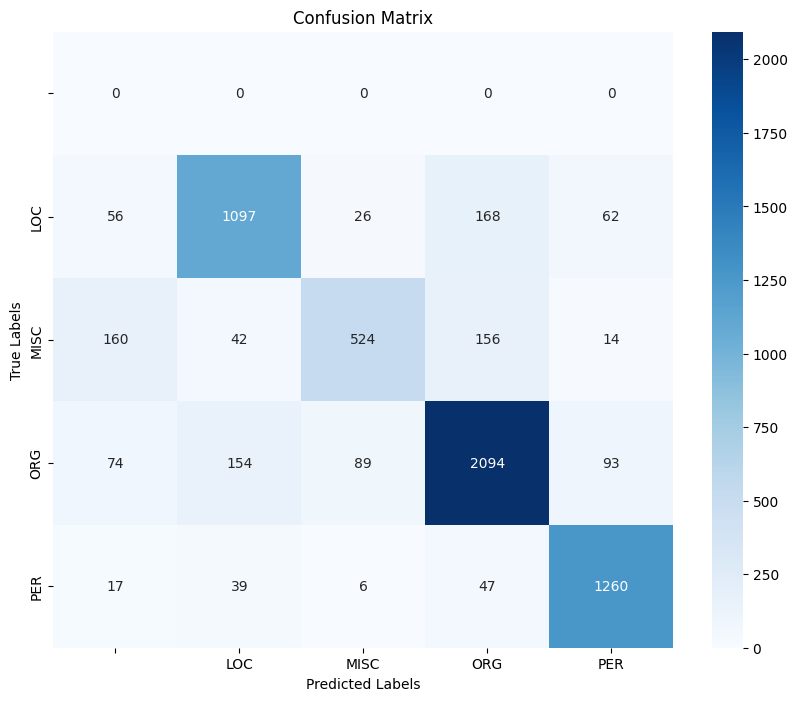

(0.7989222915484969,
 0.7917369308600337,
 0.7953133822699039,
 1426,
 0.971862689926843,
 array([[   0.,    0.,    0.,    0.,    0.],
        [  56., 1097.,   26.,  168.,   62.],
        [ 160.,   42.,  524.,  156.,   14.],
        [  74.,  154.,   89., 2094.,   93.],
        [  17.,   39.,    6.,   47., 1260.]]))

In [5]:
spanish.test(verb=True, plot=True)

In [13]:
nederlands.test(verb=True, plot=True)

You can also do some inference on new texts:

In [14]:
spanish.inference("La hija de el Doctor Guitérrez se casa en la Giralda de Sevilla con el dueño de un Peugeot")

Feature generation
type: CRF1d
feature.minfreq: 0.000000
feature.possible_states: 0
feature.possible_transitions: 0
0....1....2....3....4....5....6....7....8....9....10
Number of features: 225672
Seconds required: 0.882

L-BFGS optimization
c1: 0.000000
c2: 1.000000
num_memories: 6
max_iterations: 2147483647
epsilon: 0.000010
stop: 10
delta: 0.000010
linesearch: MoreThuente
linesearch.max_iterations: 20

***** Iteration #1 *****
Loss: 213911.042980
Feature norm: 1.000000
Error norm: 192832.293399
Active features: 225672
Line search trials: 1
Line search step: 0.000004
Seconds required for this iteration: 0.409

***** Iteration #2 *****
Loss: 141916.686980
Feature norm: 4.607445
Error norm: 50086.879043
Active features: 225672
Line search trials: 1
Line search step: 1.000000
Seconds required for this iteration: 0.186

***** Iteration #3 *****
Loss: 66869.704626
Feature norm: 3.858888
Error norm: 33777.994516
Active features: 225672
Line search trials: 2
Line search step: 5.000000
Second